# Data Wrangling

Starting off this data wrangling process, we will of course gather the data first. It comes from just one csv file named "games.csv", originating from Kaggle (https://www.kaggle.com/datasets/datasnaek/chess?select=games.csv). This dataset has information on over 20000 chess games from Lichess. The ultimate goal is to uncover useful information that can help revise a players chess strategies to improve their chances of victory.

## Data Collection

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
chess_df = pd.read_csv('games.csv')
chess_df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
chess_df[chess_df['id'] == 'l1NXvwaE']['created_at'].tolist()

[1504130000000.0]

In [4]:
chess_df[chess_df['id'] == 'l1NXvwaE']['last_move_at'].tolist()

[1504130000000.0]

## Data Definition

In [5]:
chess_df.shape

(20058, 16)

In [6]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


So there are no null values for any feature. Also most features are objects, one is a boolean, and the rest floats or integers. 

The column names with explanation are as follows:

1. **id** - generic 8-digit id for each game
2. **rated** - whether or not the game was a rated game (True), or just a casual game (False)
3. **created_at** - the start time (milliseconds from 1970, Jan 1st)
4. **last_move_at** - the end time (milliseconds from 1970, Jan 1st)
5. **turns** - the total number of turns until the game ended, including turns of both players
6. **victory_status** - method of victory
7. **winner** - which player won
8. **increment_code** - the time alloted (minutes) and time increment (seconds)
9. **white_id** - player id for the player who played as white
10. **white_rating** - player rating for the player who played as white
11. **black_id** - player id for the player who played as black
12. **black_rating** - player rating for the player who played as black
13. **moves** - all moves performed throughout the game, in standard chess notation (explanation here: https://blog.chesshouse.com/how-to-read-and-write-algebraic-chess-notation/)
14. **opening_eco** - the pening eco, a standardized code for any opening
15. **opening_name** - the opening name
16. **opening_ply** - the number of moves in the opening phase

Now let's check how many unique values there are for each feature.

In [7]:
chess_df.nunique()

id                19113
rated                 2
created_at        13151
last_move_at      13186
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
dtype: int64

Let's look at unique values for the features with less than 5 unique values, except for rated, since we already know it has boolean values, i.e. True or False.

In [8]:
pd.unique(chess_df['victory_status'])

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [9]:
pd.unique(chess_df['winner'])

array(['white', 'black', 'draw'], dtype=object)

So victory can occur due to loss of time, a player resigned, or a player achieved check mate. Also, a draw is another possible outcome for a game. In chess a draw is not considered a win or a loss for either player, so it should not be used as a victory outcome later on. 

Naturally, the winner feature has three intuitive categories, namely, white, black, or draw.

In [10]:
chess_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Some things to note here, is that again, there seems to be no missing data from the these 6 features. The white and black rating have almost identical ranges, as is expected from chess scores. More notably though, the turns and opening_ply features have max's that are significantly larger than the mean+std, so they might be outliers. 

## Data Cleaning

### Null Values

In [11]:
#From the info method above, you could see that there are no null values, but let's double check
chess_df.isnull().values.any()

False

### Duplicates

The dataset has 20058 rows, or rather chess games, but only 19113 rows with unique id values. This indicates that there should be 945 duplicate rows.

In [12]:
chess_df[chess_df.duplicated()].head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
950,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
1794,x1Svcl0P,True,1.499820e+12,1.499830e+12,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1830,wgIHzqDo,True,1.499710e+12,1.499710e+12,113,mate,white,10+0,quantummequanic,1403,barrow-wight,1364,e4 e6 e5 Bc5 d4 Be7 c3 Nh6 Bxh6 gxh6 Qd2 Bg5 f...,C00,French Defense: Steinitz Attack,3
2554,JrFxlGZo,False,1.489330e+12,1.489330e+12,78,mate,black,15+0,sp37578,1309,penguin100,1393,e4 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qc6 d3 Bf5 Qf3 Be...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
2556,ezKACesj,False,1.488840e+12,1.488840e+12,51,mate,white,15+0,penguin100,1393,sp37578,1309,d4 d5 e3 Nf6 Nf3 b6 Nc3 Bb7 Bb5+ Nc6 Ne5 e6 O-...,D04,Queen's Pawn Game: Colle System,5


In [13]:
chess_df[chess_df.duplicated(subset='id')].shape

(945, 16)

In [14]:
chess_df[chess_df.duplicated()].shape

(429, 16)

So there are 945 duplicate 'id' values, but not in general. Let's investigate a special case:

In [15]:
chess_df[chess_df['id'] == 'XRuQPSzH'].duplicated()

120      False
950       True
12412    False
13729     True
14403     True
dtype: bool

In [16]:
chess_df[chess_df['id'] == 'XRuQPSzH']

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
120,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
950,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
12412,XRuQPSzH,True,1.503584e+12,1.503584e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
13729,XRuQPSzH,True,1.503584e+12,1.503584e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
14403,XRuQPSzH,True,1.503584e+12,1.503584e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6


All these rows look identical, so lets take a closer look at what could be different. But first, let's introduce a list of all the different id's with duplicate rows.

In [17]:
dup_df = chess_df[chess_df.duplicated()]

dup_lst = list(dup_df['id'].unique())
dup_df.shape

(429, 16)

In [18]:
#just comparing the first and third rows first
chess_df[chess_df['id'] == dup_lst[0]].iloc[0, :] == chess_df[chess_df['id'] == dup_lst[0]].iloc[2, :]

id                 True
rated              True
created_at        False
last_move_at      False
turns              True
victory_status     True
winner             True
increment_code     True
white_id           True
white_rating       True
black_id           True
black_rating       True
moves              True
opening_eco        True
opening_name       True
opening_ply        True
dtype: bool

So already the start and finish time features are causing the issue. Let's look into them further.

In [19]:
chess_df[chess_df['id'] == dup_lst[0]]['created_at'].tolist()

[1503580000000.0,
 1503580000000.0,
 1503583909935.0,
 1503583909935.0,
 1503583909935.0]

In [20]:
chess_df[chess_df['id'] == dup_lst[0]]['last_move_at'].tolist()

[1503580000000.0,
 1503580000000.0,
 1503584352561.0,
 1503584352561.0,
 1503584352561.0]

So clearly there is a difference in data here. These numbers were too large to catch before so we had to change the dataframe into a list to make them more readable. Let's try now to look at duplicate values in the chess dataset when we drop these two columns. If we get 945 duplicate values, then we got what we expected and that would also confirm that the `created_at` and `last_move_at` features are the only problematic features here.

In [23]:
chess_df.drop(columns=['created_at', 'last_move_at'])
chess_df.duplicated(subset='id').sum()

945

Perfect, this means the `created_at` and `last_move_at` features are the only features left to deal with here. Naturally, each `id` refers to a unique game, so it doesn't make sense to have duplicate values, so we should remove them. It also doesn't make sense that the same game can have different sets of starting and ending times. Out of all the `created_at` and `last_move_at` pairs, it makes sense to keep the one that occurs the most. Although if you observe the first two pairs, you can see that they have the same values, which means the game was zero seconds. This obviously doesn't make sense, so this should also be considered later on.

In [24]:
#making a copy of the original dataset
chess_df2 = chess_df.copy()

#so lets loop through all id's with duplicate rows. We are going to add a new row to the bottom of the dataframe
#this new row will have created_at and last_move_at values that are the most popular
#then, once we have these rows, we will drop all other duplicates and keep these new ones
for i in range(len(dup_lst)):
    #using the counter function to count the most popular values, and order them from greatest to least
    ord_start_times = Counter(chess_df[chess_df['id'] == dup_lst[i]]['created_at'].tolist()).most_common()

    ord_end_times = Counter(chess_df[chess_df['id'] == dup_lst[i]]['last_move_at'].tolist()).most_common()
    
    #making out new row, using the first (doesn't matter which) row with the i'th id, to get the other column features
    row = chess_df[chess_df['id'] == dup_lst[i]].iloc[0]
    
    #changing our interested feature values to the most popular ones, which is the first index here
    #the second index requires 0 for the value, and 1 for the actual count, which we don't need here
    row['created_at'] = ord_start_times[0][0]
    row['last_move_at'] = ord_end_times[0][0]
    
    #adding the new row
    chess_df2 = chess_df2.append(row, ignore_index=True)


In [25]:
print('The number of rows in our new dataframe: {}'.format(chess_df2.shape[0]))
print('Number of rows with duplicate ids: {}'.format(len(dup_lst)))

The number of rows in our new dataframe: 20444
Number of rows with duplicate ids: 386


Now as expected, this new dataframe has 386 more rows than the original dataframe (20444-386=20058). So, now all we need to do is remove all the older duplicates and our new dataframe will be duplicate free.

In [29]:
chess_df2.drop_duplicates(subset = 'id', keep='last', inplace=True)
chess_df2.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10


In [32]:
print('Number of rows without duplicates: {}'.format(chess_df2.shape[0]))

Number of rows without duplicates: 19113


As expected we have 19113 rows now. If we had performed this operation on the original dataframe, we also would have had 19113 rows too, but may not have kept the best row in regards to the `create_at` and `last_move_at` features.

### Fixing the `increment_code` Column

The increment code is written as time+increment, meaning that the first number is the time on the clock that each player has to finish the game, and the number after the + sign is the increment, which is an extra amount of time alloted every move. The way this information is stored is rather hard to work with, so perhaps we should fix that, by simply splitting it up so that we have two columns of integer type, one with the time and the other with the increment.

In [33]:
chess_df2['increment_code'].unique().shape

(400,)

Note: the fact that there are 400 unique `increment_code` values shows that using this column as a categorical column would not be practical.

In [34]:
split_increments = chess_df2['increment_code'].str.split('+', n=1, expand=True)
split_increments.head()

,0,1
0,15,2
1,5,10
2,5,10
5,10,0
6,10,0


In [35]:
chess_df2['time_allotted'] = split_increments[0]
chess_df2['increment'] = split_increments[1]

#now drop the increment_code column as it is no longer needed
chess_df2.drop(columns='increment_code', inplace=True)

In [36]:
#now change these new columns to a numeric data type
chess_df2['time_allotted'] = pd.to_numeric(chess_df2['time_allotted'])
chess_df2['increment'] = pd.to_numeric(chess_df2['increment'])

In [37]:
chess_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20443
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   white_id        19113 non-null  object 
 8   white_rating    19113 non-null  int64  
 9   black_id        19113 non-null  object 
 10  black_rating    19113 non-null  int64  
 11  moves           19113 non-null  object 
 12  opening_eco     19113 non-null  object 
 13  opening_name    19113 non-null  object 
 14  opening_ply     19113 non-null  int64  
 15  time_allotted   19113 non-null  int64  
 16  increment       19113 non-null  int64  
dtypes: bool(1), float64(2), int64(6

In [38]:
#we can now look at some basic stats for these new columns
chess_df2.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,time_allotted,increment
count,1.911300e+04,1.911300e+04,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000
mean,1.483413e+12,1.483414e+12,60.513839,1597.300005,1590.045519,4.815780,13.785277,5.146497
std,2.833975e+10,2.833964e+10,33.488264,290.022740,290.441694,2.798283,17.072447,13.808620
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,0.000000,0.000000
25%,1.476910e+12,1.476912e+12,37.000000,1401.000000,1394.000000,3.000000,10.000000,0.000000
50%,1.495670e+12,1.495670e+12,55.000000,1567.000000,1563.000000,4.000000,10.000000,0.000000
75%,1.503080e+12,1.503080e+12,79.000000,1792.000000,1785.000000,6.000000,15.000000,7.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,180.000000,180.000000


It looks like, along with the `turns` and `opening_ply` features, the `time_allotted` and `increment` features also have oddly large maximums. Since chess is a challenging and complex game, it makes sense to have some rare games where a significantly large amount of time is allotted, whether to give the players as much time as needed, or because they just did not wish to care about the clock. In the case of the latter, then the game may not have been a rated game, which might be something to expore later on.

### Exploring Outliers

Thanks to the above description, we know to just focus on the `turns`, `opening_ply`, `time_allotted` and `increment` features with regards to outliers.

#### `turns`

In [50]:
chess_df2[chess_df2['turns'] > 112].shape

(1574, 17)

Here we looked at rows with a number of turns greater the the 75% quartile + the std, which gave us the 112. Seeing that we have 1574 rows still, this makes up almost 10% of the data, so these are probably not outliers. Let's try doubling the 112 now.

In [51]:
chess_df2[chess_df2['turns'] > 224].shape

(4, 17)

In [52]:
chess_df2[chess_df2['turns'] > 224]

,id,rated,created_at,last_move_at,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,time_allotted,increment
4236,vQq60Hur,True,1.474480e+12,1.474490e+12,255,draw,draw,manipin,1585,kasparovd0311,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,C00,French Defense: Queen's Knight,3,7,2
16386,cZiGllu7,True,1.481753e+12,1.481755e+12,259,draw,draw,aragon26,1441,lone-wolf,1461,d4 d5 c4 c6 Nc3 Nf6 Bg5 Nbd7 Qc2 Qb6 e3 h6 Bf4...,D10,Slav Defense #2,5,15,5
16645,5ZjOnwjl,True,1.480271e+12,1.480272e+12,226,draw,draw,chunnev,1817,jhonthoth,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,C00,French Defense: Knight Variation,3,10,0
20269,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13,10,0


There are only 4 values here this time. As mentioned before, one might think that games with a large turn count is too long for a standard ranked game, and so they might be causal games which may not be as valuable (casual games might indicate players weren't playing optimally since a win or loss wouldn't affect their rating). Interestingly, you can see in all four cases here that all the games were rated. Thus, it might be best to keep these outliers, at least for now.

#### `opening_ply`

Now let's go through the same process with the other three aforementioned features. The std + the 75% quatile for the opening_ply feature is about 8.8.

In [54]:
chess_df2[chess_df2['opening_ply'] > 8.8].shape

(1924, 17)

Again, this accounts for too much of the data to warrant being deemed as outliers. Let's try doubling 8.8.

In [55]:
chess_df2[chess_df2['opening_ply'] > 8.8*2].shape

(37, 17)

37 rows still is a lot to be calling outliers. Let's take a closer look.

In [60]:
#sorting by opening_ply to see the largest values
sorted_opening = chess_df2[chess_df2['opening_ply'] > 8.8*2].sort_values('opening_ply', ascending=False)

#only showing a few relevant columns to make it more readable.
sorted_opening[['rated', 'turns', 'victory_status', 'winner', 'opening_ply']].head(8)

,rated,turns,victory_status,winner,opening_ply
16443,True,34,resign,black,28
17900,True,45,resign,black,28
4475,False,32,outoftime,black,28
19412,True,61,resign,white,28
18853,True,65,outoftime,white,24
17965,True,60,resign,black,22
10422,True,97,resign,black,20
14507,False,34,resign,white,20


Right away, seeing multiple rows sharing the `opening_ply` value indicates that these are not outliers. Moreover, the first `opening_ply` value less than 28 is 24, which is not a drastic difference in value (just a little bit more than the standard deviation for `opening_ply`). Thus, these are likely not outliers and are probably worth keeping.

#### `time_allotted`

Intuitively, it makes sense that the large `time_allotted` and `increment` values coincide with the large `turns` values, but let's make sure.

In [61]:
#again the 32 is the std+75% quartile
chess_df2[chess_df2['time_allotted'] > 32].shape

(497, 17)

In [62]:
#doubling the 32 here, since 497 is a decent amount of rows to be considered outliers.
chess_df2[chess_df2['time_allotted'] > 64].shape

(196, 17)

497 seems like a decent amount of rows to be deemed outliers, although it is actually only about 2% of the data that we have. 196 rows is only about !% of the data, so we could regard these as outliers. Let's take a closer look.

In [64]:
#sorting by opening_ply to see the largest values
sorted_time_all = chess_df2[chess_df2['time_allotted'] > 64].sort_values('time_allotted', ascending=False)

#only showing a few relevant columns to make it more readable.
sorted_time_all[['rated', 'turns', 'victory_status', 'winner', 'opening_ply', 'time_allotted', 'increment']].head(12)

,rated,turns,victory_status,winner,opening_ply,time_allotted,increment
682,False,21,outoftime,white,4,180,0
9971,True,3,resign,white,1,180,0
9973,True,2,resign,black,1,180,0
9974,True,3,resign,white,1,180,180
9975,True,3,resign,white,1,180,180
9976,True,3,resign,white,1,180,0
9977,True,3,resign,white,1,180,180
9978,True,2,resign,black,2,180,0
9979,True,3,resign,white,1,180,180
9980,True,2,resign,black,1,180,180


Clearly, you can see there are many rows with the max `time_allotted` value, which indicates, these are not outliers. In fact, it makes sense that these were games where they did not care to have a timer, so this was probably the default max time you could set in chess. Many of these games are rated as well, so dismissing them for being casual games is not permissable here. Thus we cannot say these rows are outliers, however this may indicate the `time_allotted` column might not be useful since it is so skewed. Or rather, since these rows only make up about 1% of the total rows in our data, perhaps it is worth investigating whether or not to remove these rows in the EDA part of this project. 

Just a quick note about the rest of the values. You'll notice the min value is 0, and the 25% and 50% quartiles have the same value of 10. This seems a bit odd, and the min value could be an outlier. But if you look at the unqiue values below, you'll see that there are only 33, and there does not seem to be a drastic increase in values as it goes up.

In [80]:
print(sorted(chess_df2['time_allotted'].unique()))
print('Number of unique time_allotted values: {}'.format(len(sorted(chess_df2['time_allotted'].unique()))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 29, 30, 35, 40, 45, 60, 90, 120, 150, 180]
Number of unique time_allotted values: 33


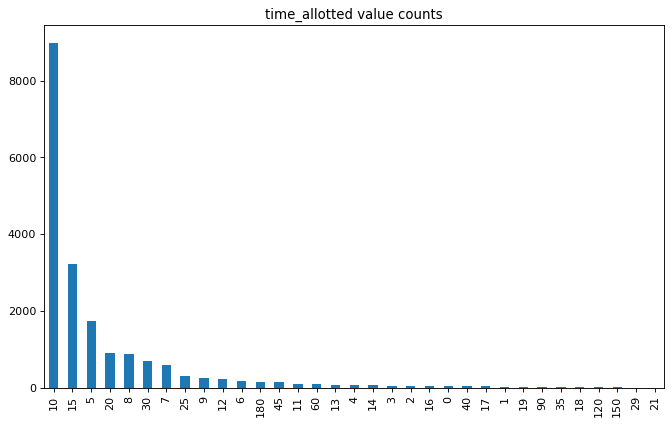

In [102]:
#lets make a chart to visualize the count of these values
figure(figsize=(10, 6), dpi=80)

vc_time = chess_df2['time_allotted'].value_counts()

vc_time.plot(kind='bar')
plt.title('time_allotted value counts')
plt.show()

So now you can clearly see why both the 25% and 50% quartile values were 10, which is that the data for this feature is very skewed, with the vast majority being 10. Likely, this is a chess standard. Perhaps this makes the feature relatively useless as well, since if you were to get rid of all the lower count values you would get rid of almost half the data. Also note the `time_allotted` 180 value is less insignificant to the `time_allotted` 10 value than most others, again showing that this maximum value should not be treated as an outlier. 

#### `increment`

In [103]:
#again the 20 is the std+75% quartile
chess_df2[chess_df2['increment'] > 20].shape

(657, 17)

In [104]:
#doubling the 20 here, since 657 is a decent amount of rows to be considered outliers
chess_df2[chess_df2['increment'] > 40].shape

(267, 17)

The `increment` column seems to be in a similar situation as the `time_allotted` column. Before we continue though, notice that the min, 25% quartile, and the 50% quartile are all 0. Also, the std is almost 14, which is double the 75% quartile value. This seems odd, so let's skip to looking at the value counts here.

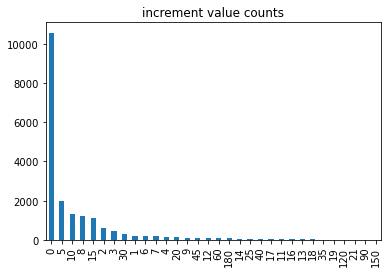

In [105]:
inc_time = chess_df2['increment'].value_counts()

inc_time.plot(kind='bar')
plt.title('increment value counts')
plt.show()

Again this data is very skewed, with over half being 0. This explains the statistics above, but also indicates that this column might be rather useless. Also, it is likely most rows with a `time_allotted` value of 10 also have an `increment` value of 0. In fact, we can check this.

In [114]:
inc_time_df = chess_df2[chess_df2['increment'] == 0]
inc_time_df[chess_df2['time_allotted'] == 10].shape

<ipython-input-114-b75e2d3cfbb6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inc_time_df[chess_df2['time_allotted'] == 10].shape


(7356, 17)

Indeed, there are 7356 rows with a `time_allotted` value of 10 and `increment` value of 0, which is pretty close to half of the data. That being said, there doesn't seem to be any obvious outliers here. If these features are used in the EDA part of this project, are are for whatever reason causing issues, it might be useful to remove all rows with an `increment` value below a certain threshold, to get rid of the massive skew (and similary for the `time_allotted` feature). The skew occurs due to the min value though, so there will always be a skew anyways, thus potentially making this ineffective.

But to sum up this outlier section, none of the `turns`, `opening_ply`, `time_allotted` and `increment` features seem to have obvious outliers that we can remove, but some insights gained were that the `time_allotted` and `increment` features might be worth removing, the `turns` feature has a few oddly large values that could be removed if need be, and the `opening_ply` feature seems fine to leave as is.

### Modifying the `created_at` and `last_move_at` columns

Something noted earlier was that the `created_at` and `last_move_at` columns sometimes had the same values in some of the rows. This means that for those games, the total time the game lasted was 0 seconds, which obviously makes no sense. We may need to remove these rows, but first let's see how many of these there are.

In [122]:
zero_time = (chess_df2['created_at'] - chess_df2['last_move_at'] == 0)

print('There are {} games that lasted for 0 seconds.'.format(zero_time.sum()))

There are 8058 games that lasted for 0 seconds.


8058 rows accounts for about 40% of the data. This is way too much to remove. Luckily, we already mentioned earlier that these columns may not be of great benefit, just intuitively speaking. Also, how long a game lasts is information that is somewhat already contained in the `time_allotted` feature, and also the `turns` feature. Ultimately, this is something to explore in the EDA part of this project, but for now it does not make sense to remove these rows quite yet. However, we can clean these two features up by subtracting them from one another and taking that as the new column. This new column of course represents how long a game lasts, which is easier to read than two large numbers that have random start times from many decades ago.

In [123]:
#get our new column
chess_df2['total_time'] = chess_df2['last_move_at'] - chess_df2['created_at']

In [131]:
#converting the total_time into seconds, since milliseconds is not as easy to think about
chess_df2['total_time'] = chess_df2['total_time']/1000

In [126]:
#now lets drop the 'created_at' and 'last_move_at' columns
chess_df2.drop(['created_at', 'last_move_at'], axis=1, inplace=True)

In [137]:
chess_df2.reset_index(inplace=True)

In [139]:
chess_df2.drop(['index'], axis=1, inplace=True)

In [142]:
chess_df2.head()

,id,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,time_allotted,increment,total_time
0,TZJHLljE,False,13,outoftime,white,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,15,2,0.0
1,l1NXvwaE,True,16,resign,black,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,0.0
2,mIICvQHh,True,61,mate,white,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,5,10,0.0
3,MsoDV9wj,False,5,draw,draw,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,10,0,0.0
4,qwU9rasv,True,33,resign,white,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,10,0,0.0


In [141]:
#our finalized new dataframe
chess_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   turns           19113 non-null  int64  
 3   victory_status  19113 non-null  object 
 4   winner          19113 non-null  object 
 5   white_id        19113 non-null  object 
 6   white_rating    19113 non-null  int64  
 7   black_id        19113 non-null  object 
 8   black_rating    19113 non-null  int64  
 9   moves           19113 non-null  object 
 10  opening_eco     19113 non-null  object 
 11  opening_name    19113 non-null  object 
 12  opening_ply     19113 non-null  int64  
 13  time_allotted   19113 non-null  int64  
 14  increment       19113 non-null  int64  
 15  total_time      19113 non-null  float64
dtypes: bool(1), float64(1), int64(6), object(8)
memory usage: 2.2+ MB


In [143]:
chess_df2.to_pickle('chess_data') 

## Summary

This project comes from kaggle, which had only one csv file, so collecting the data was easy. The data had 16 columns, with definitions for each on kaggle as well. Some definitions required further understanding of chess itself, but links were provided above for this.  

Data cleaning makes up most of this notebook. As it turns out, there were no missing values, but lots of duplicates. It doesn't make too much sense to have duplicates when each row represents a unique chess game, so they were dropped. Before this though, apparently the only columns causing the duplicates were the `created_at` and `last_move_at` columns. So, to deal with this the row that was kept for the games with duplicates were the ones that had the most frequent values of the `created_at` and `last_move_at` columns. 

The next columns that was cleaned was the `increment_code` column. It was originally a string with two potentially meaningful numbers, so the column was split into two columns (the `time_allotted` and `increment` columns), each with one of the values. Now, moving on to outliers, it seem these columns and the `turns` and `opening_ply` columns had some outliers close to their maximumn values within their repective ranges. After some exploring, nothing conclusive came out, and not rows were removed here, but there were some notes made. More specifically, it seems like the `time_allotted` and `increment` features may actually not be very valuable, and the `turns` feature has a few oddly large values that could be removed if need be, but its best to leave them in for now. Some of the insights gained here are things to continue exploring in the EDA part of the project.

Finally, a note about the  `created_at` and `last_move_at` was made earlier about how they had the same values in some rows. There were too many rows with this issue to remove now, but the columns were modified into just one column depicting the total time a game took. This way, these columns will be easier to analyze later on. The final dataframe was then saved.